In [1]:
%pylab
%matplotlib inline

import curveshortening

import _image_processing
import _image_curve

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
t = linspace(0, 1, 200, endpoint=False)

a = vstack((cos(2*pi*t), sin(2*pi*t)))
a.shape

(2, 200)

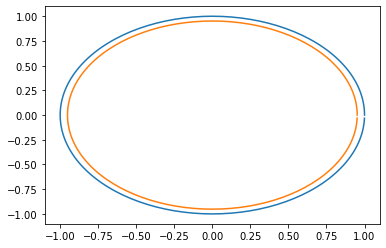

In [3]:
plot(*(a))
plot(*(curveshortening._gaussian_filter(a.transpose(), 10).transpose()))

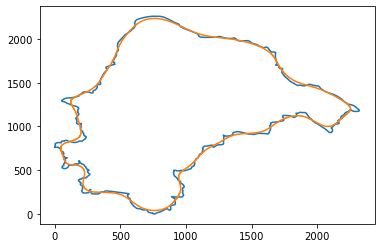

In [4]:
im = _image_processing.load_image(r"C:/Users/ghage/PycharmProjects/morphoscale/lib/silhouettes/brazil-silhouette.bmp")
curve = _image_curve.ImageCurve(im).curve()
plt.plot(*curve.transpose())
plt.plot(*curveshortening._gaussian_filter(curve, 100).transpose())

In [5]:
print(-1/curveshortening._curvature(a.transpose())[0])
print(-1/curveshortening._curvature(curveshortening._gaussian_filter(a.transpose(), 10))[0])

1.000123382739851
0.9520042220955196


In [6]:
nverts = 200
ratios = linspace(1, 0, 1000, endpoint=False)[::-1]
radii = []
_ = [radii.append(-1/curveshortening._curvature(curveshortening._gaussian_filter(a.transpose(), i*nverts))[0]) 
     for i in ratios]

In [7]:
sigma = pi/20
gauss = np.exp(-ratios**2/(2*sigma**2))

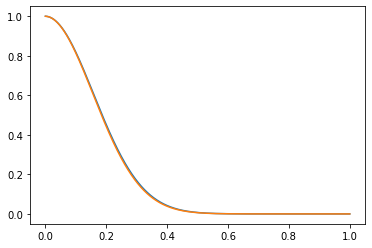

In [8]:
plot(ratios, radii)
plot(ratios, gauss)

In [9]:
curveshortening._gaussian_filter(curve, 100).shape
curveshortening._curvature(curveshortening._gaussian_filter(curve, 100)).shape

C:\Users\ghage\PycharmProjects\convexcurveshortening\curveshortening.py:152: RuntimeWarning: invalid value encountered in true_divide
  return ((tangent[:, 1] * normal[:, 0] - normal[:, 1] * tangent[:, 0])


(8564,)

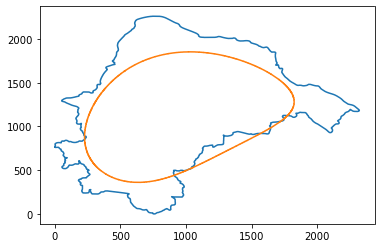

In [10]:
plot(*curve.transpose())
plot(*curveshortening._gaussian_filter(curve, 0.1*len(curve)).transpose())

8.05718042944369 8.06228254936257


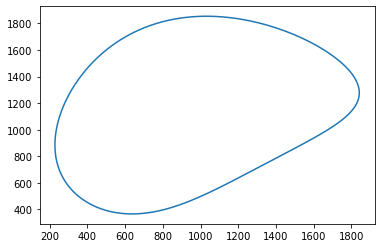

In [17]:
curve = curve10
curvex = resample_gauss(curve, 0.1*len(curve))
plot(*curvex.transpose())
print(curveshortening._edge_length(curve).mean(), curveshortening._edge_length(curvex).mean())

In [12]:
curve10 = curveshortening._resample(curve, curveshortening._edge_length(curve).sum() / (10*len(curve)))
len(curve), len(curve10)
curve.shape

(8564, 2)

In [16]:
def resample_gauss(curve, sigma):
    return curveshortening._resample(
        curveshortening._gaussian_filter(curve, sigma), 1 / curveshortening._edge_length(curve).mean())

In [ ]:
nverts = curve10.shape[0]
ratios = linspace(1, 0.8, 10, endpoint=False)[::-1]
radii = []
_ = [radii.append(-1/curveshortening._curvature(curveshortening._gaussian_filter(curve10, i*nverts)).mean()) 
     for i in ratios]

In [ ]:
_ = [plot(*curveshortening._gaussian_filter(curve10, i*nverts).transpose()) for i in ratios]

In [199]:
sigma = pi/20
gauss = np.exp(-ratios**2/(2*sigma**2))

nverts = curvex.shape[0]
ratios = linspace(1, 0, 100, endpoint=False)[::-1]
curves = [curveshortening._gaussian_filter(curvex, i*nverts) for i in ratios]
radii = [1/curveshortening._curvature(curve).mean() for curve in curves]
mean_distances_to_centre = [linalg.norm(curve-curve.mean(axis=0), axis=1).mean() for curve in curves]

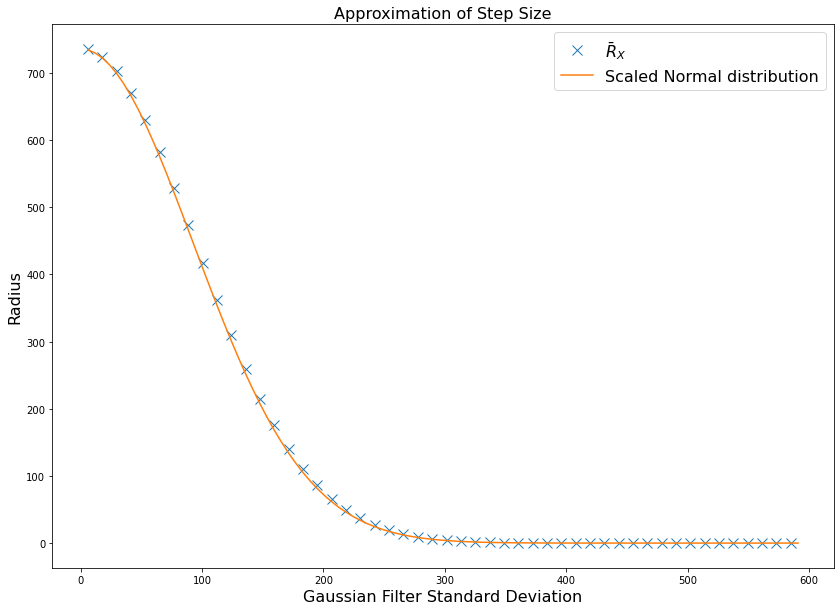

In [200]:
figure(figsize=(14, 10))
title('Approximation of Step Size', fontsize=16)
plot(ratios[::2]*nverts, mean_distances_to_centre[::2], 'x', markersize=10, label=r'$\bar R_X$')
plot(ratios*nverts, max(mean_distances_to_centre) * gauss, label=r'Scaled Normal distribution')
# plot(linear_ratios, max(mean_distances_to_centre) * np.exp(-linear_ratios**2/(2*sigma**2)))
xlabel('Gaussian Filter Standard Deviation', fontsize=16)
ylabel('Radius', fontsize=16)
legend(fontsize=16)

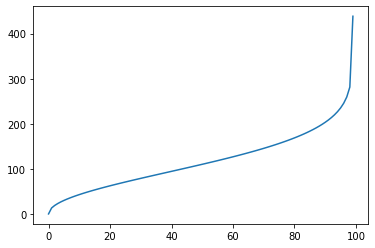

In [191]:
linear_ratios = nverts * sqrt(2*sigma**2*log(700/linspace(700, 0.01, 100)))
plot(linear_ratios)

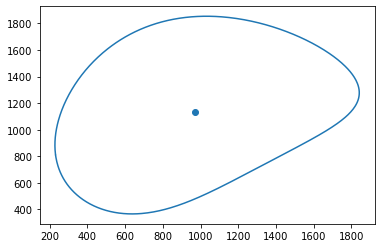

In [51]:
scatter(*curvex.mean(axis=0))
plot(*curvex.transpose())

In [55]:
linalg.norm(curvex-curvex.mean(axis=0), axis=1).mean()

736.9229001507045

In [188]:
nverts

591

In [211]:
sigma = pi/20
gauss = np.exp(-ratios**2/(2*sigma**2))

nverts = curvex.shape[0]
linear_ratios = sqrt(2*sigma**2*log(linalg.norm(curvex-curvex.mean(axis=0), axis=1).mean()
                                    /linspace(linalg.norm(curvex-curvex.mean(axis=0), axis=1).mean()-1, 0.01, 10)))
ratios = linspace(1, 0.01, 10)[::-1]
curves = [curveshortening._gaussian_filter(curvex, i*nverts) for i in linear_ratios]
radii = [1/curveshortening._curvature(curve).mean() for curve in curves]
mean_distances_to_centre = [linalg.norm(curve-curve.mean(axis=0), axis=1).mean() for curve in curves]

ValueError: x and y must have same first dimension, but have shapes (10,) and (100,)

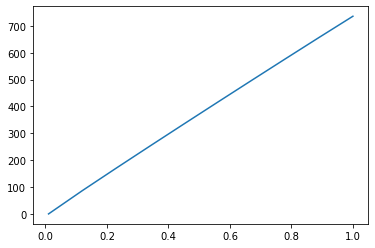

In [212]:
plot(ratios[::-1], mean_distances_to_centre)
plot(ratios, gauss)

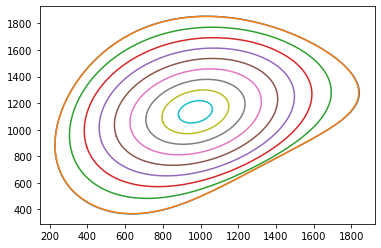

In [213]:
plot(*curvex.transpose())
_ = [plot(*curve.transpose()) for curve in curves]

In [152]:
nverts * linear_ratios

array([435.17270269, 382.81146651, 367.87345542, 358.59974888,
       351.79881142, 346.40006532, 341.90909092, 338.05565441,
       334.67548353, 331.66106852])